# Prediction of Dynamic Variables in Sznajd Model

## Imports

In [160]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

BASE_SIMULATION_DIR = 'data/simulations/'
BASE_MEASURE_DIR = 'data/measures/'
C = 'consensus_time'
F = 'opinion_change_frequency'

## Reading CSV files

### Measures

In [161]:
measures_file_list = []
for network in os.listdir(BASE_MEASURE_DIR):
    df = pd.read_csv(BASE_MEASURE_DIR + network, index_col=0)
    df.insert(0, 'type', network.split('.')[0])
    measures_file_list.append(df)

measures_df = pd.concat(measures_file_list)

FEATURES = list(measures_df.columns)

In [162]:
FEATURES = FEATURES[1:]

In [163]:
measures_df = measures_df.rename_axis(['network'])
measures_df

,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality
network,,,,,,,,,
waxman_82.edgelist,waxman,0.025635,0.295991,1196.828,3.392656,0.362602,0.108543,0.003759,0.005682
waxman_79.edgelist,waxman,0.021697,NaN,1230.986,inf,0.285520,0.134962,0.003451,0.005842
waxman_25.edgelist,waxman,0.023940,0.294132,1207.612,3.414224,0.292464,0.131139,0.003666,0.005662
waxman_68.edgelist,waxman,0.026031,0.297837,1186.384,3.371768,0.308317,0.134348,0.003776,0.005643
waxman_45.edgelist,waxman,0.022857,NaN,1185.302,inf,0.330039,0.116628,0.003832,0.005440
...,...,...,...,...,...,...,...,...,...
barabasi_nonlinear_05_70.edgelist,barabasi_nonlinear_05,0.026158,0.314893,1096.054,3.191108,0.086532,0.161709,0.003628,0.005178
barabasi_nonlinear_05_5.edgelist,barabasi_nonlinear_05,0.026566,0.314503,1098.162,3.195324,0.101256,0.168347,0.003640,0.005145
barabasi_nonlinear_05_10.edgelist,barabasi_nonlinear_05,0.027925,0.314313,1099.302,3.197604,0.091078,0.182128,0.003635,0.005141


Get only finite values

In [165]:
measures_df = measures_df[(measures_df['average_shortest_path_lenght'] != np.inf) & (measures_df['closeness'] != np.nan)]

### Simulations

In [166]:
simulations_file_list = []
for network in os.listdir(BASE_SIMULATION_DIR):
    simulations_file_list.append(pd.read_csv(BASE_SIMULATION_DIR + network, index_col=0, header=[0,1]))

simulations_df = pd.concat(simulations_file_list)

In [167]:
simulations_df = simulations_df.stack(level=0, future_stack=True).rename_axis(['network','initialization']).reset_index(1)
simulations_df

,initialization,consensus_time,opinion_change_frequency
network,,,
waxman_82.edgelist,random,772.81,274.49
waxman_82.edgelist,direct,1510.22,243.60
waxman_82.edgelist,inverse,462.14,371.60
waxman_79.edgelist,random,902.50,279.39
waxman_79.edgelist,direct,1743.45,262.68
...,...,...,...
barabasi_nonlinear_05_57.edgelist,direct,622.77,200.00
barabasi_nonlinear_05_57.edgelist,inverse,420.58,427.66
barabasi_nonlinear_05_33.edgelist,random,530.02,259.31


### Merging and creating the dataset

In [168]:
dataset = measures_df.merge(simulations_df, on='network', how='inner')

We are doing some scaling to visualize better the results

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# dataset[FEATURES] = scaler.fit_transform(dataset[FEATURES])

Visualizing the created dataset

In [170]:
dataset.describe()

,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,consensus_time,opinion_change_frequency
count,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000
mean,0.124723,0.306941,1445.612743,3.890225,0.199581,-0.027939,0.003352,0.007609,5454.129878,1106.204853
std,0.221236,0.094215,1075.288624,2.150577,0.175426,0.152001,0.000871,0.006251,13138.230557,2176.829890
min,0.008343,0.096122,548.311000,2.095622,0.029795,-0.394020,0.001307,0.003230,14.380000,200.000000
25%,0.023899,0.304514,1007.158000,3.013316,0.061100,-0.078335,0.002967,0.005002,339.297500,239.082500
50%,0.027664,0.314519,1098.013000,3.195026,0.093410,-0.012530,0.003628,0.005270,442.685000,276.405000
75%,0.067528,0.333588,1144.816000,3.288632,0.382928,0.027742,0.004047,0.005572,709.217500,408.790000
max,0.652846,0.478556,4797.811000,10.594622,0.621034,0.204217,0.004293,0.027219,72565.190000,10212.310000


In [171]:
dataset

,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,initialization,consensus_time,opinion_change_frequency
network,,,,,,,,,,,,
waxman_82.edgelist,waxman,0.025635,0.295991,1196.828,3.392656,0.362602,0.108543,0.003759,0.005682,random,772.81,274.49
waxman_82.edgelist,waxman,0.025635,0.295991,1196.828,3.392656,0.362602,0.108543,0.003759,0.005682,direct,1510.22,243.60
waxman_82.edgelist,waxman,0.025635,0.295991,1196.828,3.392656,0.362602,0.108543,0.003759,0.005682,inverse,462.14,371.60
waxman_25.edgelist,waxman,0.023940,0.294132,1207.612,3.414224,0.292464,0.131139,0.003666,0.005662,random,803.60,285.37
waxman_25.edgelist,waxman,0.023940,0.294132,1207.612,3.414224,0.292464,0.131139,0.003666,0.005662,direct,1252.14,236.12
...,...,...,...,...,...,...,...,...,...,...,...,...
barabasi_nonlinear_05_57.edgelist,barabasi_nonlinear_05,0.028275,0.313281,1104.134,3.207268,0.096775,0.178332,0.003652,0.005233,direct,622.77,200.00
barabasi_nonlinear_05_57.edgelist,barabasi_nonlinear_05,0.028275,0.313281,1104.134,3.207268,0.096775,0.178332,0.003652,0.005233,inverse,420.58,427.66
barabasi_nonlinear_05_33.edgelist,barabasi_nonlinear_05,0.026015,0.314583,1097.906,3.194812,0.097762,0.177413,0.003639,0.005155,random,530.02,259.31


## Training and prediction

In [172]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, GroupKFold, StratifiedGroupKFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
import optuna

## Opinion Change Frequency
considering only random initialization

In [187]:
dataset['groups'] = LabelEncoder().fit_transform(dataset['type'])
dataset.reset_index(inplace=True)

,network,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,initialization,consensus_time,opinion_change_frequency,groups
0,waxman_82.edgelist,waxman,0.025635,0.295991,1196.828,3.392656,0.362602,0.108543,0.003759,0.005682,random,772.81,274.49,6
1,waxman_82.edgelist,waxman,0.025635,0.295991,1196.828,3.392656,0.362602,0.108543,0.003759,0.005682,direct,1510.22,243.60,6
2,waxman_82.edgelist,waxman,0.025635,0.295991,1196.828,3.392656,0.362602,0.108543,0.003759,0.005682,inverse,462.14,371.60,6
3,waxman_25.edgelist,waxman,0.023940,0.294132,1207.612,3.414224,0.292464,0.131139,0.003666,0.005662,random,803.60,285.37,6
4,waxman_25.edgelist,waxman,0.023940,0.294132,1207.612,3.414224,0.292464,0.131139,0.003666,0.005662,direct,1252.14,236.12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,barabasi_nonlinear_05_57.edgelist,barabasi_nonlinear_05,0.028275,0.313281,1104.134,3.207268,0.096775,0.178332,0.003652,0.005233,direct,622.77,200.00,2
1970,barabasi_nonlinear_05_57.edgelist,barabasi_nonlinear_05,0.028275,0.313281,1104.134,3.207268,0.096775,0.178332,0.003652,0.005233,inverse,420.58,427.66,2
1971,barabasi_nonlinear_05_33.edgelist,barabasi_nonlinear_05,0.026015,0.314583,1097.906,3.194812,0.097762,0.177413,0.003639,0.005155,random,530.02,259.31,2
1972,barabasi_nonlinear_05_33.edgelist,barabasi_nonlinear_05,0.026015,0.314583,1097.906,3.194812,0.097762,0.177413,0.003639,0.005155,direct,623.03,200.00,2


In [227]:
filtered_dataset = dataset[dataset['initialization'] == 'inverse']
X = filtered_dataset[FEATURES]
y = filtered_dataset[F]

In [228]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [229]:
model = RandomForestRegressor()

### Cross Validation

In [230]:
outer_cross_validation = GroupKFold(n_splits=5)

splits = outer_cross_validation.split(X_train, y=y_train, groups=np.array(dataset.loc[X_train.index, 'groups']))
r2_score_list = []

for train_index, val_index in tqdm(splits):
    # Divide dataset de acordo com os splits da validação cruzada
    _X_train, _X_val = X.iloc[train_index], X.iloc[val_index]
    _y_train, _y_val = y.iloc[train_index], y.iloc[val_index]
    

    # Implementa a Inner CV
    inner_cross_validation = KFold(n_splits=3, shuffle=True, random_state=0)
    # Define o modelo
    model = RandomForestRegressor(random_state=1)
    # Define o espaço de busca
    space = {
        # 'max_depth': [10, 20, 30, 40, 50],
        'max_features': [2, 3, 4],
        # 'min_samples_leaf': [1, 2, 4],
        # 'min_samples_split': [2, 5, 10],
        'n_estimators': [300, 400, 1000],
    }

    # Define a busca
    search = GridSearchCV(model, space, scoring='r2', cv=inner_cross_validation, refit=True)
    # Executa
    result = search.fit(_X_train, _y_train)
    # Pega o melhor estimador
    best_model = result.best_estimator_

    y_val_pred = best_model.predict(_X_val)
    score = r2_score(_y_val, y_val_pred)
    r2_score_list.append(score)

    print('--> R2=%.3f, Inner Estimation=%.3f, Param=%s' % (score, result.best_score_, result.best_params_))

print(f'Mean R2 Score: {np.mean(r2_score_list)} +- {np.std(r2_score_list)}')

1it [00:29, 29.99s/it]

--> R2=0.982, Inner Estimation=0.984, Param={'max_features': 2, 'n_estimators': 1000}


2it [00:59, 29.68s/it]

--> R2=0.982, Inner Estimation=0.984, Param={'max_features': 2, 'n_estimators': 1000}


3it [01:28, 29.49s/it]

--> R2=0.981, Inner Estimation=0.984, Param={'max_features': 2, 'n_estimators': 400}


4it [01:56, 28.94s/it]

--> R2=0.983, Inner Estimation=0.981, Param={'max_features': 3, 'n_estimators': 1000}


5it [02:24, 28.83s/it]

--> R2=0.985, Inner Estimation=0.982, Param={'max_features': 4, 'n_estimators': 1000}
Mean R2 Score: 0.9825626433323595 +- 0.0015435069224528084


### Nested Cross Validation

In [193]:
class Objective:
    def __init__(self, X, y, cross_validation):
        self.X = X
        self.y = y
        self.cross_validation = cross_validation
        
    def __call__(self, trial):
        parameters = {
            'random_state': 1,
            'max_depth': trial.suggest_int('max_depth', 2, 50),
            'max_features': trial.suggest_int('max_features', 2, 4),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, step=2),
            'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        }

        rf_regressor = RandomForestRegressor(**parameters)
        score_list = []
        splits = self.cross_validation.split(
            self.X, 
            y=self.y
        )

        for train_index, val_index in splits:
            _X_train, _X_val = self.X.iloc[train_index], self.X.iloc[val_index]
            _y_train, _y_val = self.y.iloc[train_index], self.y.iloc[val_index]

            model = clone(rf_regressor)

            model.fit(_X_train, _y_train)
            y_val_pred = model.predict(_X_val)
            score = r2_score(_y_val, y_val_pred)
            score_list.append(score)

        return np.mean(score_list)

In [195]:
outer_cross_validation = StratifiedKFold(n_splits=4)

groups = np.array(dataset.loc[X_train.index, 'groups'])
splits = outer_cross_validation.split(X_train, y=groups, groups=groups)
r2_score_list = []

for train_index, val_index in tqdm(splits):
    # Divide dataset de acordo com os splits da validação cruzada
    _X_train, _X_val = X.iloc[train_index], X.iloc[val_index]
    _y_train, _y_val = y.iloc[train_index], y.iloc[val_index]
    
    study = optuna.create_study(direction='maximize')
    study.optimize(
        Objective(
            _X_train, 
            _y_train, 
            KFold(n_splits=5, shuffle=True, random_state=0)
        ), 
        n_trials=30,
    )
    
    best_inner = study.best_value
    best_params = study.best_params

    best_model = RandomForestRegressor(**best_params)
    best_model.fit(_X_train, _y_train)
    y_val_pred = best_model.predict(_X_val)
    score = r2_score(_y_val, y_val_pred)
    r2_score_list.append(score)

    print('--> R2=%.3f, Inner Estimation=%.3f, Param=%s' % (score, best_inner, best_params))

print(f'Mean R2 Score: {np.mean(r2_score_list)} +- {np.std(r2_score_list)}')

/home/frois/Documentos/SznajdNetworks/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
0it [00:00, ?it/s][I 2024-08-12 11:13:54,535] A new study created in memory with name: no-name-fae11169-530f-4779-8e91-d51a571d521b
[I 2024-08-12 11:14:16,272] Trial 0 finished with value: 0.6296417839599797 and parameters: {'max_depth': 28, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1362}. Best is trial 0 with value: 0.6296417839599797.
[I 2024-08-12 11:14:36,101] Trial 1 finished with value: 0.674993823861979 and parameters: {'max_depth': 17, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1838}. Best is trial 1 with value: 0.674993823861979.
[I 2024-08-12 11:14:41,014] Trial 2 finished with value: 0.6369090607219439 and parameters: {'max_depth': 22, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estim

--> R2=0.677, Inner Estimation=0.762, Param={'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 694}


[I 2024-08-12 11:20:00,181] Trial 0 finished with value: 0.6899105785199448 and parameters: {'max_depth': 27, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 1004}. Best is trial 0 with value: 0.6899105785199448.
[I 2024-08-12 11:20:18,745] Trial 1 finished with value: 0.6825819775173421 and parameters: {'max_depth': 41, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1554}. Best is trial 0 with value: 0.6899105785199448.
[I 2024-08-12 11:20:34,287] Trial 2 finished with value: 0.712794468897435 and parameters: {'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1894}. Best is trial 2 with value: 0.712794468897435.
[I 2024-08-12 11:20:44,357] Trial 3 finished with value: 0.6208218933859284 and parameters: {'max_depth': 41, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 663}. Best is trial 2 with value: 0.712794468897435.
[I 2024-08-12 1

--> R2=0.762, Inner Estimation=0.771, Param={'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 133}


[I 2024-08-12 11:23:59,445] Trial 0 finished with value: 0.5965441483856135 and parameters: {'max_depth': 41, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 941}. Best is trial 0 with value: 0.5965441483856135.
[I 2024-08-12 11:24:06,576] Trial 1 finished with value: 0.6502103120518076 and parameters: {'max_depth': 21, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 556}. Best is trial 1 with value: 0.6502103120518076.
[I 2024-08-12 11:24:13,889] Trial 2 finished with value: 0.6155127333322798 and parameters: {'max_depth': 45, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 624}. Best is trial 1 with value: 0.6502103120518076.
[I 2024-08-12 11:24:31,420] Trial 3 finished with value: 0.6973212868555078 and parameters: {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1626}. Best is trial 3 with value: 0.6973212868555078.
[I 2024-08-12 11

--> R2=0.038, Inner Estimation=0.751, Param={'max_depth': 2, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


[I 2024-08-12 11:28:24,855] Trial 0 finished with value: 0.6492675307811935 and parameters: {'max_depth': 43, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1193}. Best is trial 0 with value: 0.6492675307811935.
[I 2024-08-12 11:28:49,317] Trial 1 finished with value: 0.6421120265054092 and parameters: {'max_depth': 35, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 1636}. Best is trial 0 with value: 0.6492675307811935.
[I 2024-08-12 11:29:06,703] Trial 2 finished with value: 0.6288461102356004 and parameters: {'max_depth': 27, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1532}. Best is trial 0 with value: 0.6492675307811935.
[I 2024-08-12 11:29:34,110] Trial 3 finished with value: 0.6490097534531285 and parameters: {'max_depth': 22, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1877}. Best is trial 0 with value: 0.6492675307811935.
[I 2024-08

--> R2=-1.277, Inner Estimation=0.752, Param={'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 974}
Mean R2 Score: 0.05010331428055037 +- 0.8159730561489846


Text(0.5, 1.0, 'Opinion Change Frequency')

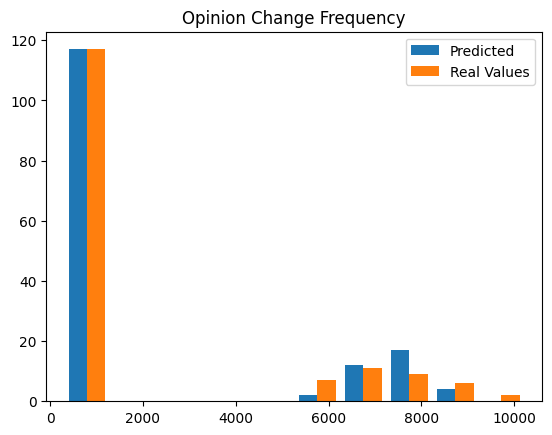

In [231]:
plt.hist([y_val_pred, _y_val])
plt.legend(['Predicted', 'Real Values'])
plt.title('Opinion Change Frequency')

### Ploting Feature Importance

Text(0.5, 1.0, 'Feature Importance Opinion Change Frequency')

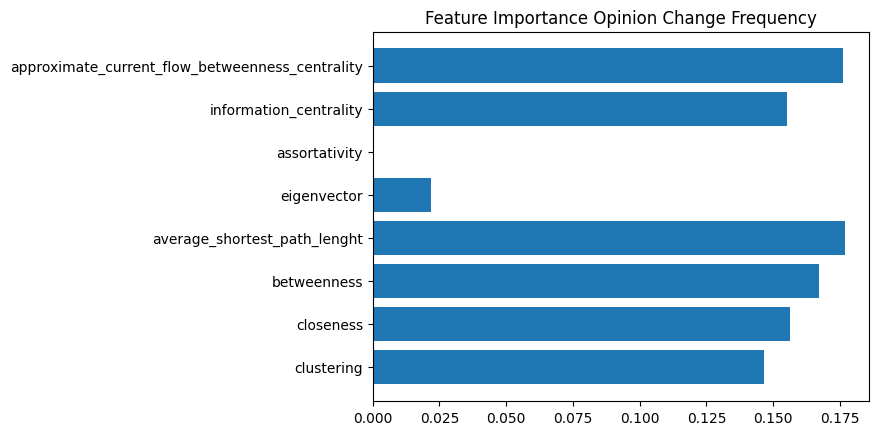

In [232]:
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)
fig, ax = plt.subplots()
ax.barh(FEATURES, model.feature_importances_)
ax.set_title(f'Feature Importance Opinion Change Frequency')

### Ploting correlation

[]

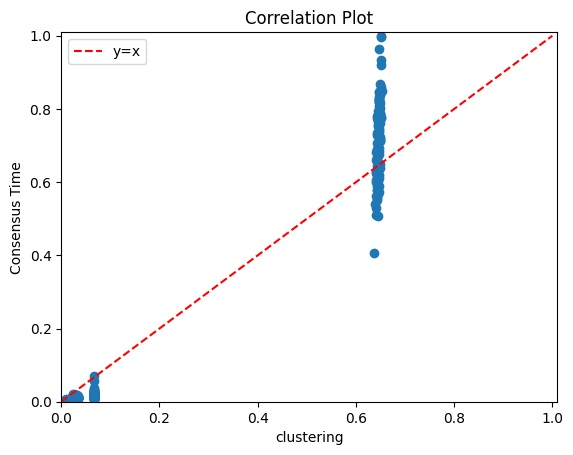

In [234]:
fig, ax = plt.subplots()
measure_to_plot = 'clustering'
scaled_y = scaler.fit_transform(np.array(y).reshape(-1, 1))
ax.scatter(X[measure_to_plot], scaled_y)
ax.set_xlabel(measure_to_plot)
ax.set_ylabel('Consensus Time')
max_value = max(max(X[measure_to_plot]), max(scaled_y)) * 1.01
line = ax.plot([0,1], [0, 1], '--', color='red', label='y=x')
ax.legend(handles=line)
ax.set_xlim(0,max_value)
ax.set_ylim(0, max_value)
ax.set_title('Correlation Plot')
plt.plot()

### Testing

In [199]:
y_test_pred = model.predict(X_test)
score = r2_score(y_test, y_test_pred)
print(f'R2 Score on test: {score}')

R2 Score on test: 0.7871296833486368


[]

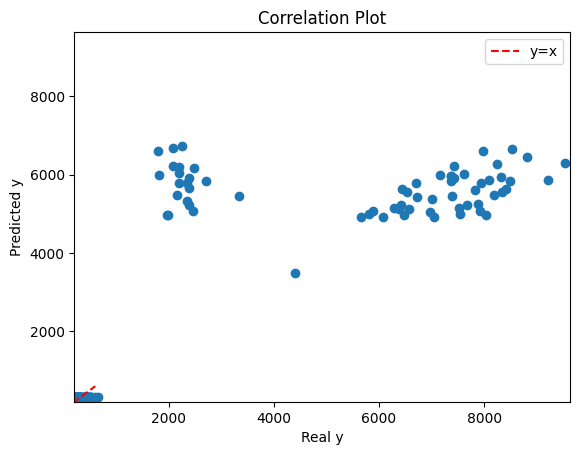

In [200]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred)
ax.set_xlabel('Real y')
ax.set_ylabel('Predicted y')
max_value = max(max(y_test), max(y_test_pred)) * 1.01
min_value = min(min(y_test), min(y_test_pred)) * 1.01
line = ax.plot([0,600], [0, 600], '--', color='red', label='y=x')
ax.legend(handles=line)
ax.set_xlim(min_value,max_value)
ax.set_ylim(min_value, max_value)
ax.set_title('Correlation Plot')
plt.plot()

## Consensus Time

In [201]:
dataset['groups'] = LabelEncoder().fit_transform(dataset['type'])

In [202]:
X = dataset[FEATURES]
y = dataset[C]

In [203]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [204]:
model = RandomForestRegressor()

### Nested Cross Validation

In [ ]:
class Objective:
    def __init__(self, X, y, cross_validation):
        self.X = X
        self.y = y
        self.cross_validation = cross_validation
        
    def __call__(self, trial):
        parameters = {
            'random_state': 1,
            'max_depth': trial.suggest_int('max_depth', 2, 50),
            'max_features': trial.suggest_int('max_features', 2, 4),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, step=2),
            'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        }

        rf_regressor = RandomForestRegressor(**parameters)
        score_list = []
        splits = self.cross_validation.split(
            self.X, 
            y=self.y
        )

        for train_index, val_index in splits:
            _X_train, _X_val = self.X.iloc[train_index], self.X.iloc[val_index]
            _y_train, _y_val = self.y.iloc[train_index], self.y.iloc[val_index]

            model = clone(rf_regressor)

            model.fit(_X_train, _y_train)
            y_val_pred = model.predict(_X_val)
            score = r2_score(_y_val, y_val_pred)
            score_list.append(score)

        return np.mean(score_list)

In [205]:
outer_cross_validation = StratifiedKFold(n_splits=4)

groups = np.array(dataset.loc[X_train.index, 'groups'])
splits = outer_cross_validation.split(X_train, y=groups, groups=groups)
r2_score_list = []

for train_index, val_index in tqdm(splits):
    # Divide dataset de acordo com os splits da validação cruzada
    _X_train, _X_val = X.iloc[train_index], X.iloc[val_index]
    _y_train, _y_val = y.iloc[train_index], y.iloc[val_index]
    
    study = optuna.create_study(direction='maximize')
    study.optimize(
        Objective(
            _X_train, 
            _y_train, 
            KFold(n_splits=5, shuffle=True, random_state=0)
        ), 
        n_trials=30,
    )
    
    best_inner = study.best_value
    best_params = study.best_params

    best_model = RandomForestRegressor(**best_params)
    best_model.fit(_X_train, _y_train)
    y_val_pred = best_model.predict(_X_val)
    score = r2_score(_y_val, y_val_pred)
    r2_score_list.append(score)

    print('--> R2=%.3f, Inner Estimation=%.3f, Param=%s' % (score, best_inner, best_params))

print(f'Mean R2 Score: {np.mean(r2_score_list)} +- {np.std(r2_score_list)}')

/home/frois/Documentos/SznajdNetworks/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
0it [00:00, ?it/s][I 2024-08-12 11:37:29,360] A new study created in memory with name: no-name-51b57f3b-a005-4adc-bce3-b9695f1db50f
[W 2024-08-12 11:37:40,990] Trial 0 failed with parameters: {'max_depth': 25, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 1993} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/frois/Documentos/SznajdNetworks/venv/lib/python3.12/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_187647/3520138012.py", line 30, in __call__
    model.fit(_X_train, _y_train)
  File "/home/frois/Documentos/SznajdNetworks/venv/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
 

KeyboardInterrupt: 

Text(0.5, 1.0, 'Consensus Time')

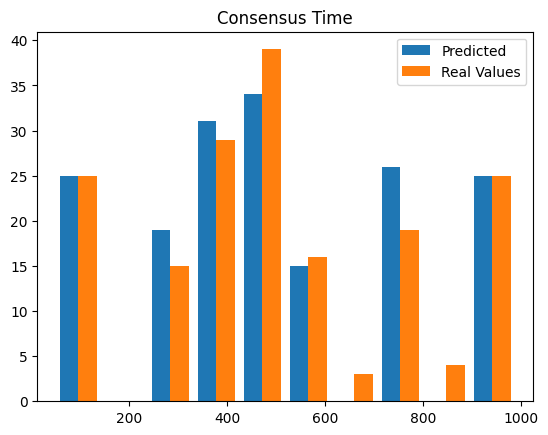

In [ ]:
plt.hist([y_val_pred, _y_val])
plt.legend(['Predicted', 'Real Values'])
plt.title('Consensus Time')

### Ploting Feature Importance

Text(0.5, 1.0, 'Feature Importance Consensus Time')

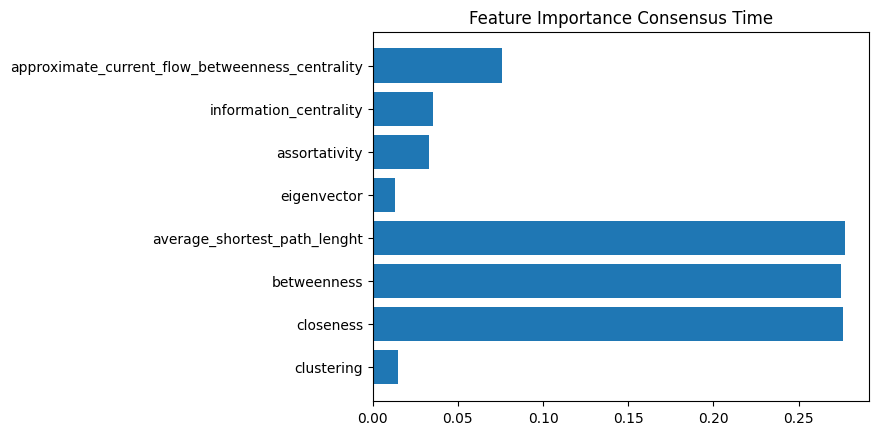

In [ ]:
model = RandomForestRegressor(**best_params)
model.fit(X_train, y_train)
fig, ax = plt.subplots()
ax.barh(FEATURES, model.feature_importances_)
ax.set_title(f'Feature Importance Consensus Time')

### Testing

In [ ]:
y_test_pred = model.predict(X_test)
score = r2_score(y_test, y_test_pred)
print(f'R2 Score on test: {score}')

R2 Score on test: 0.9807813265049518


[]

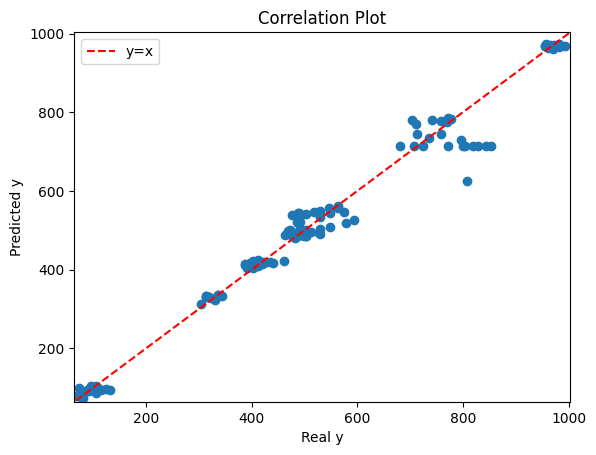

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred)
ax.set_xlabel('Real y')
ax.set_ylabel('Predicted y')
max_value = max(max(y_test), max(y_test_pred)) * 1.01
min_value = min(min(y_test), min(y_test_pred)) * 1.01
line = ax.plot([0,1100], [0, 1100], '--', color='red', label='y=x')
ax.legend(handles=line)
ax.set_xlim(min_value,max_value)
ax.set_ylim(min_value, max_value)
ax.set_title('Correlation Plot')
plt.plot()